<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

<ipython-input-1-42c61fcb489f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='Region', palette='viridis')


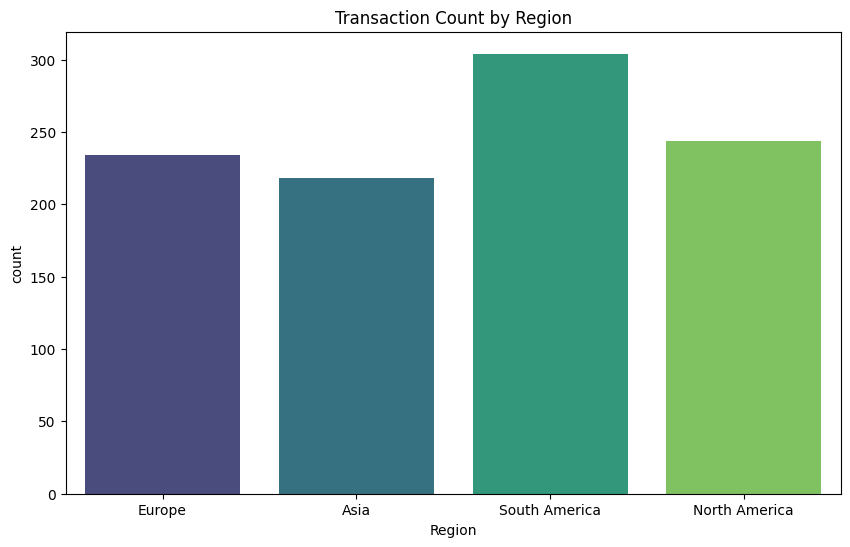

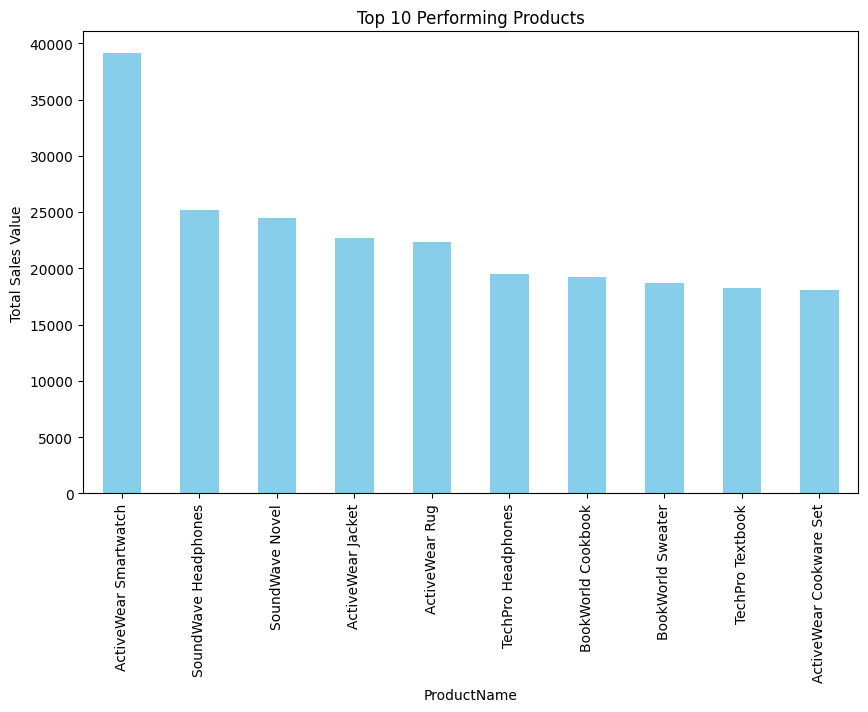

<ipython-input-1-42c61fcb489f>:38: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])


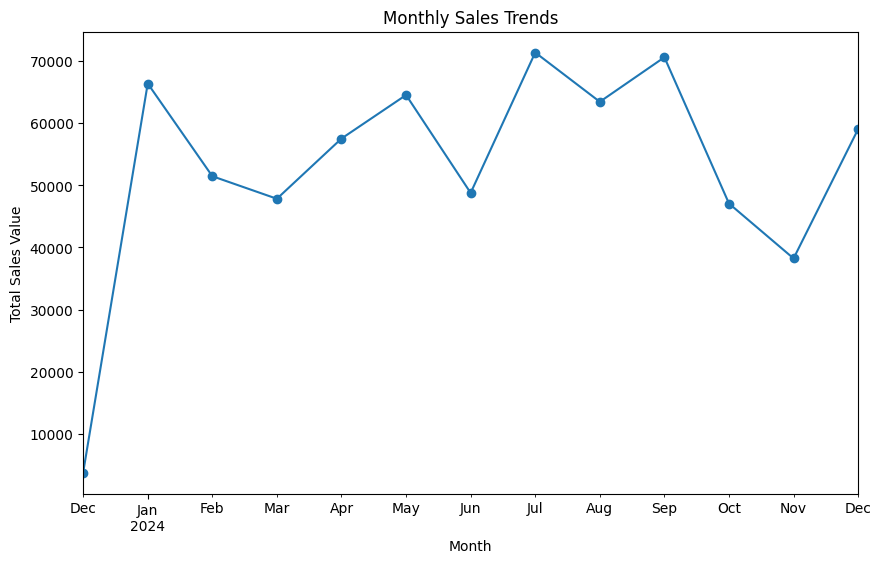

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv(r'/home/Customers.csv')
products = pd.read_csv(r'/home/Products.csv')
transactions = pd.read_csv(r'/home/Transactions.csv')

# Quick overview of the datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Merge datasets for EDA
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Summary statistics
print(merged_data.describe())

# Missing value analysis
print(merged_data.isnull().sum())

# Plotting transaction count by region
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Region', palette='viridis')
plt.title('Transaction Count by Region')
plt.show()

# Analyzing the top-performing products
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Performing Products')
plt.ylabel('Total Sales Value')
plt.show()

# Time-based analysis of transactions
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales Trends')
plt.ylabel('Total Sales Value')
plt.show()
